# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Malte Kramp

Datum: 19.11.2023

Gruppe: 09

## Forschungsfrage

Wie hoch ist die Wärmekapazität eines Weinglases?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


In [ ]:
In zwei Behältern werden 100ml warmes und 200ml kaltes wasser erst seperat mit zwei temperatursensoren gemessen und dann zusammengeschüttet.

<img src="figures/Wärmekapazität.JPG" width="800">

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
datapath = 'data/heat_capacity/heat_capacity.h5'

# DONE #

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
import h5py as h5

with h5.File(datapath) as f:
    #die datasets werden aus der hdf5 Datei ausgelesen...
    time1 = f["RawData/1ee86df3-2fdd-6c45-9f5d-3d0fe20ac536/timestamp"]
    temp1 = f["RawData/1ee86df3-2fdd-6c45-9f5d-3d0fe20ac536/temperature"]
    time2 = f["RawData/1ee86df2-76e8-67c7-94aa-05d73d83f205/timestamp"]
    temp2 = f["RawData/1ee86df2-76e8-67c7-94aa-05d73d83f205/temperature"]
    #...und zum leichtere Umgang als numpy arrays gespeichert
    time_1=np.array(time1)
    temp_1=np.array(temp1)
    time_2=np.array(time2)
    temp_2=np.array(temp2)
    
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


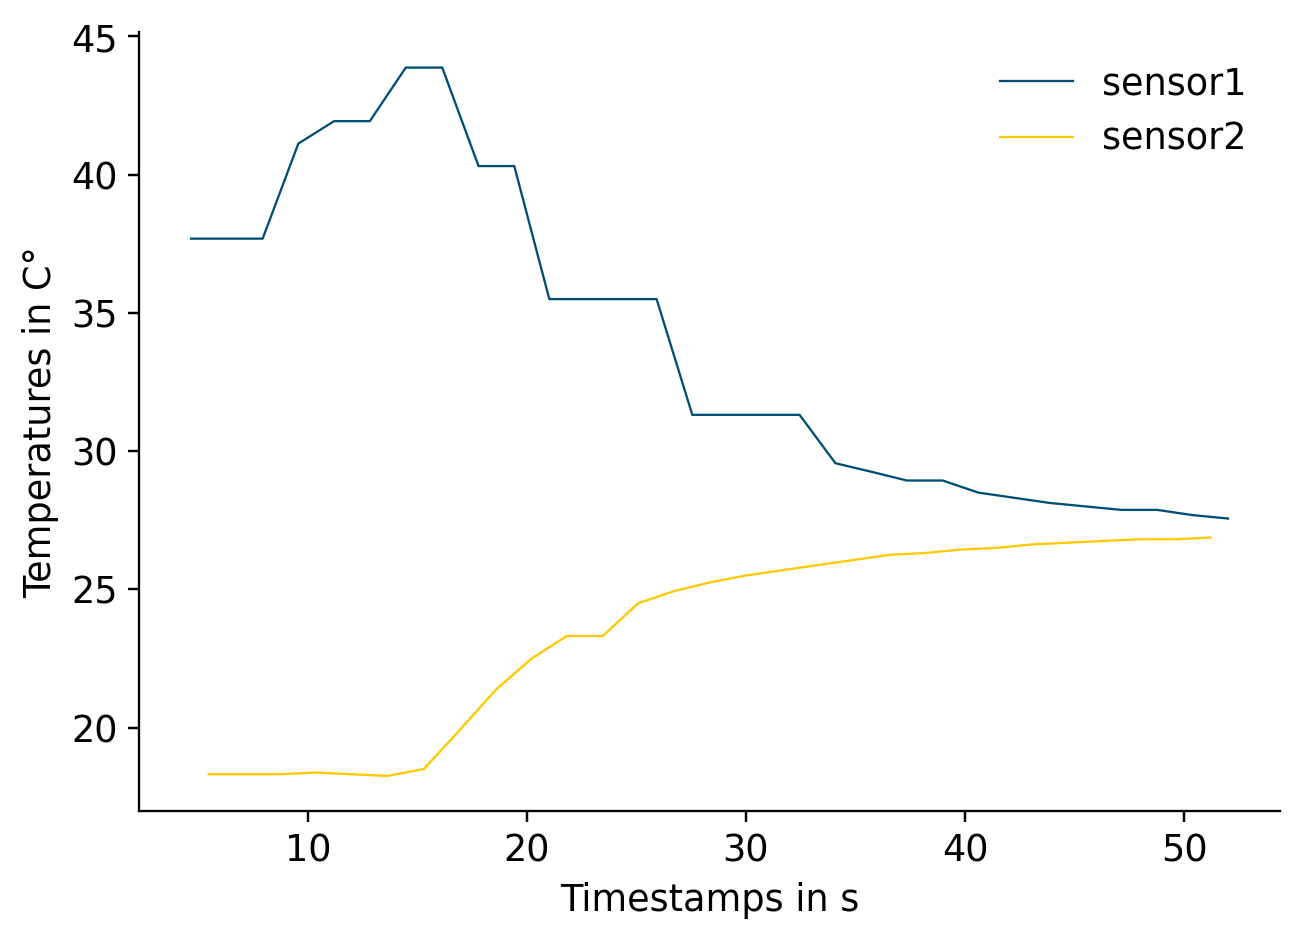

In [5]:
# TODO: Use the temperature and time data for plotting
#erstellen der plots
plt.plot(time_1, temp_1, label = 'sensor1')
plt.plot(time_2, temp_2, label = 'sensor2')
#achsen beschriften
plt.xlabel('Timestamps in s')
plt.ylabel('Temperatures in C°')
plt.legend() 
plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [108]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

#Aufgrund von ungünstigem Dukomentationsformat können die relevanten Massen nicht direkt ausgelesen werden

folder_path = '/home/pi/Documents/Thonny_Dokuments/calorimetry_home/data/heat_capacity'
text = m_json.get_json_entry(folder_path, '1ee86e24-2a02-675e-ad42-a063a787bb00', ["probe", "info"])
print(text)
#daher gezieltes greifen der werte aus dem float
Mass_hot_water = 0.001*int(text[8:11])
Mass_cold_water = 0.001*int(text[32:35])
Mass_glass = 0.001*int(text[57:60])

# DONE #

pouring 100ml of hot water into 200ml of cold water in a 130 gramm wine glass


#### (iV) Anfangs- und Endwert der Temperatur

In [109]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#ich nehme die Temperatur erst ab der siebten stelle, da dort der sensor im Heißen Wasser bis zum maximum aufgewärmt war
T1 = temp_2[7]
T2 = temp_1[7]
#weil die sensoren am ende nicht den selben Wert haben nehme ich den mittelwert
TM = (temp_1[28]+temp_2[28])/2

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [110]:
# TODO: Calculate heat capacity of the calorimeter

C = (Mass_hot_water * water_heat_capa * ( T2 - TM ))/ ( TM - T1 ) - Mass_cold_water * water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [111]:
# TODO: Print result

print('Wärmekapazität Weinglas:', C, 'J/kg*K')

# DONE #

Wärmekapazität Weinglas: 0.10850212765957445 J/kg*K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Das Ergebnis scheint sehr genau und wirkt realistisch.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Die Automatische Durchführung durch die im Hintergrund laufenden Skripte haben den Versuch sehr einfach durchzuführen gemacht. Dies wäre grade dann von Vorteil, wenn ein Versuch mehrmals wiederholt werden müsste.